# **Automatización de Generación de Reporte de Ventas**

Librerías utilizadas:

In [24]:
import pandas as pd # Procesamiento de datos
from matplotlib import pyplot as plt # Generación de gráficos
from reportlab.pdfgen import canvas # Generación de PDF

Importamos el archivo de ventas:

In [25]:
# Cargamos los datos y creamos un DataFrame
df = pd.read_csv('./data/ventas.csv')
df

,fecha,producto,precio,cantidad,vendedor
0,2023-01-01,Manzanas,1.20,10,Carlos
1,2023-01-02,Plátanos,0.50,15,María
2,2023-01-03,Naranjas,0.80,8,Carlos
3,2023-01-04,Manzanas,1.20,5,Juan
4,2023-01-05,Naranjas,0.80,12,Carlos
5,2023-01-06,Fresas,3.00,7,Carlos
6,2023-01-07,Mangos,1.75,9,Lucía
7,2023-01-08,Manzanas,1.20,6,Carlos
8,2023-01-09,Sandía,0.60,20,Pedro
9,2023-01-10,Melón,1.00,14,Carlos


Generamos algunas estadísticas importantes para el reporte:

In [27]:
# Calculamos el total de ingresos
df['ingresos'] = df['precio'] * df['cantidad']
total_ingresos = df['ingresos'].sum()

# Obtener el mejor vendedor
mejor_vendedor = df.groupby('vendedor')['ingresos'].sum().idxmax()

Creamos un gráfico de pastel para visualizar las ventas por producto:

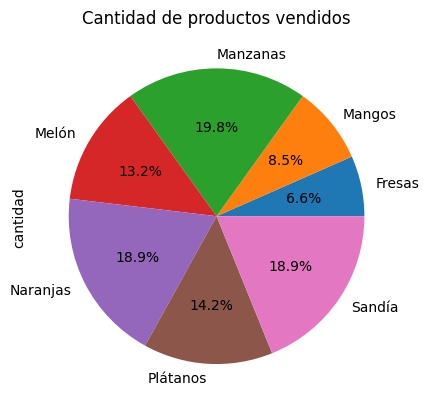

In [40]:
df.groupby('producto')['cantidad'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Cantidad de productos vendidos')
plt.savefig('./media/cantidad_productos_vendidos.png')

Generamos un archivo de reporte en formato PDF:

In [48]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet

doc = SimpleDocTemplate('./media/informe.pdf', pagesize=letter)
styles = getSampleStyleSheet()
elements = [
    Paragraph("Informe de Ventas", styles["Title"]),
    Paragraph(f"<b>Total de ingresos:</b> {total_ingresos}", styles["BodyText"]),
    Paragraph(f"<b>Mejor vendedor:</b> {mejor_vendedor}", styles["BodyText"]),
    Image('./media/cantidad_productos_vendidos.png', width=400, height=400, hAlign='CENTER'),
    Paragraph("Informe generado automáticamente con Python.", styles["Italic"])
]

doc.build(elements)
